In [1]:
#Step 1: Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import linregress

In [2]:
#Step 2: load dataset
data = pd.read_csv('C:/Users/ericy/Desktop/medical_clean.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# C: Univariate Statistics.  2 continuous & 2 categorical
#Univariate 2 categorical: Stroke and Doc_visits
#Univariate Statistical Analysis of 'Stroke' using Frequency Table
data['Stroke'].value_counts()

No     8007
Yes    1993
Name: Stroke, dtype: int64

Text(0, 0.5, 'Total Count')

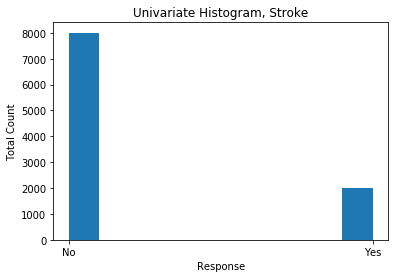

In [5]:
# Visualization of 'Stroke' using histogram
plt.hist(data['Stroke'])
plt.title('Univariate Histogram, Stroke')
plt.xlabel('Response')
plt.ylabel('Total Count')

In [6]:
#Initial_admin univariate statistical analysis with frequency table
data['Initial_admin'].value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

Text(0, 0.5, 'Total Count')

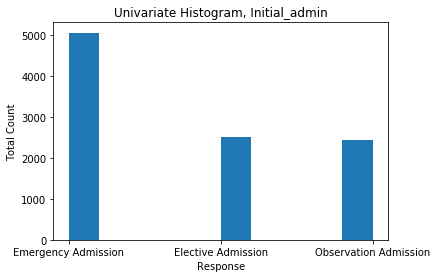

In [7]:
#Initial_admin visualization using histogram
plt.hist(data['Initial_admin'])
plt.title('Univariate Histogram, Initial_admin')
plt.xlabel('Response')
plt.ylabel('Total Count')

In [8]:
#2 continuous variables using Univariate Statistical Analysis - Income & TotalCharge
#Summary Stats of 'Income'
data['Income'].mean()

40490.495159999846

In [9]:
data['Income'].median()

33768.42

In [10]:
data['Income'].std()

28521.15329318396

Text(0, 0.5, 'Frequency Count')

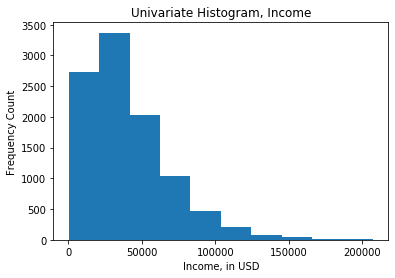

In [11]:
#'Income' Visualization
plt.hist(data['Income'])
plt.title('Univariate Histogram, Income')
plt.xlabel('Income, in USD')
plt.ylabel('Frequency Count')

In [12]:
#Summary Stats of 'TotalCharge'
data['TotalCharge'].mean()

5312.172768750177

In [13]:
data['TotalCharge'].median()

5213.951999999999

In [14]:
data['TotalCharge'].std()

2180.3938378109415

Text(0, 0.5, 'Frequency Count')

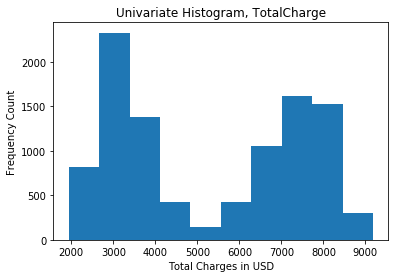

In [15]:
#'TotalCharge' Visualization
plt.hist(data['TotalCharge'])
plt.title('Univariate Histogram, TotalCharge')
plt.xlabel('Total Charges in USD')
plt.ylabel('Frequency Count')

Arthritis    No   Yes
ReAdmis              
No         4086  2245
Yes        2340  1329


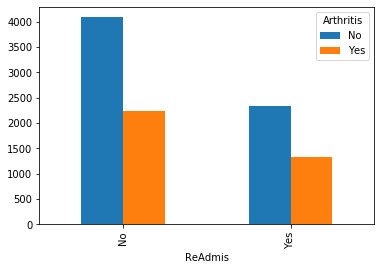

In [16]:
# D: Bivariate Statistics: 2 continuous & 2 categorical
# 2 categorical: Variables ReAdmis and Arthritis using Chi Square Analyis
# Visualization
#Arthritis
ReArN = pd.crosstab(data['ReAdmis'], data['Arthritis'])
print(ReArN)
ReArN.plot(kind='bar')

In [17]:
# Bivariate Statistical Analysis of ReAdmis and Arthritis using Chi Squared
chi2ar, par, dofar, expectedar = chi2_contingency(ReArN)
print('chi2 stat', chi2ar, 'p value', par, 'dof', dofar, 'expected values', expectedar)
if par < .1:
    print('Reject the Null Hypothesis')
else:
    print('Accept the Null Hypothesis')


chi2 stat 0.5545124468934712 p value 0.4564797501244029 dof 1 expected values [[4068.3006 2262.6994]
 [2357.6994 1311.3006]]
Accept the Null Hypothesis


In [18]:
# 2 Continuous variables: Additional_charges and Initial_days
# Bivariate Statistical Analysis of Income and Age using Regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Additional_charges'],data['Initial_days'])
print('p_value is', p_value, 'r-squared', r_value**2)

p_value is 0.6593322230998617 r-squared 1.9438248404066487e-05


Text(0, 0.5, 'Additional Charges')

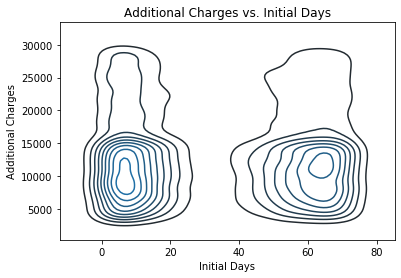

In [19]:
# Citation for Kernal Density Estimate graph usage: (seaborn.kdeplot.  N.d.)
#Kernel Density Estimate KDE plot two continuous variables
sns.kdeplot(data['Initial_days'], data['Additional_charges'])
plt.title('Additional Charges vs. Initial Days')
plt.xlabel('Initial Days')
plt.ylabel('Additional Charges')